#                             Data Analysis on Ames Housing Dataset

# Problem Statement: 
- Finding out how different features are related to SalePrice.
- Also,To findout linearly related features with SalePrice to build linear Regression model.

In [1]:
#importing Pandas Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [15]:
train_df=pd.read_csv('./datasets/train.csv')

In [16]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [17]:
train_df.shape

(2051, 81)

TRAIN DATA_FRAME CLEANING

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [19]:
#dealing missing data:

<AxesSubplot:>

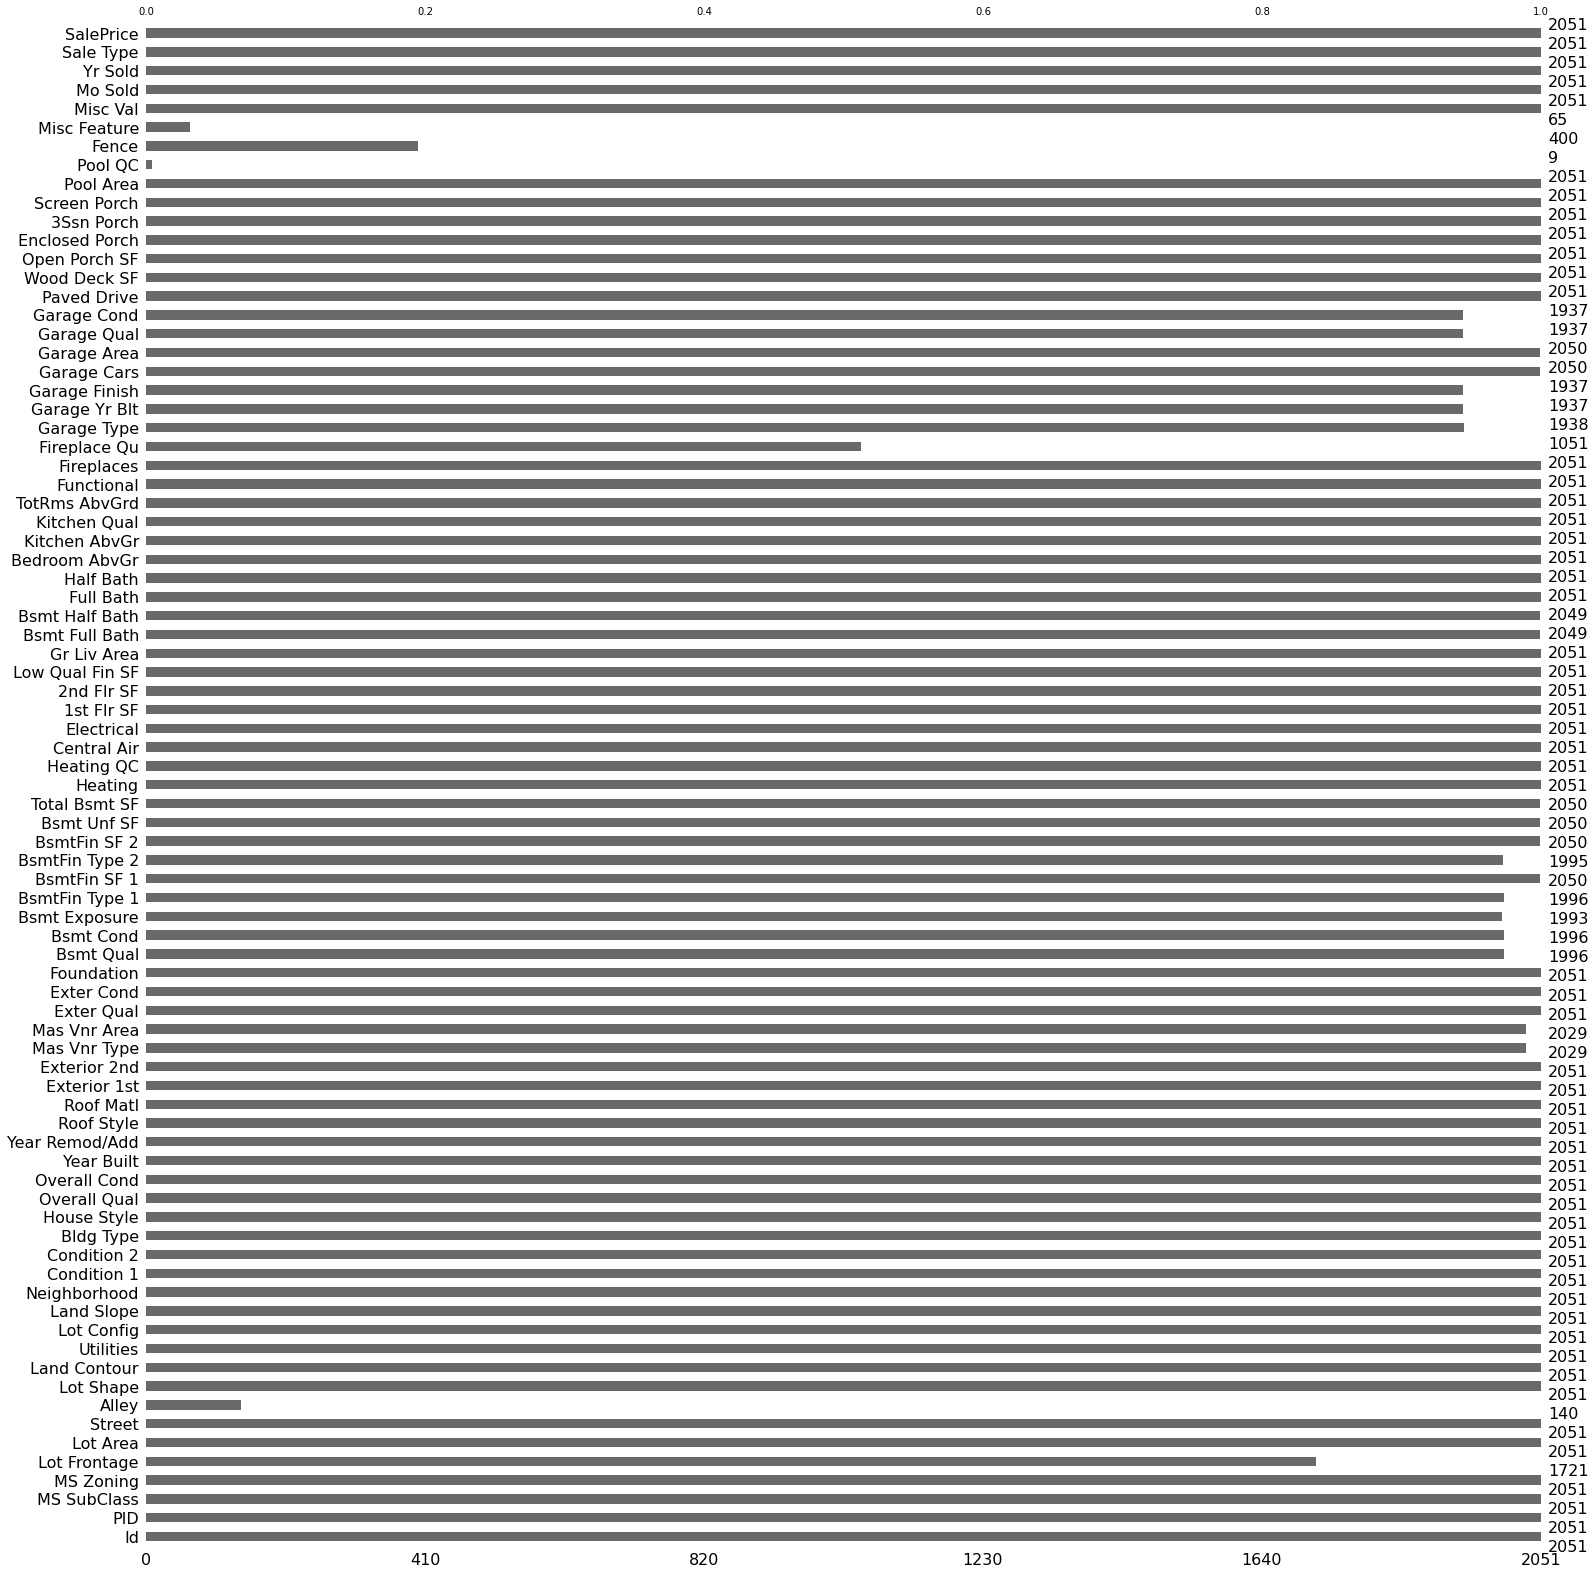

In [20]:
msno.bar(train_df)

In [21]:
# dropping ---Misc Feature:only 65 rows,Fence:only 400 rows;Pool QC:only 9 rows;Alley:140 rows:
#Fireplace Qu:half of data is missing

train_df=train_df.drop(columns=['Misc Feature','Fence','Alley','PID','Pool QC','Fireplace Qu'])

In [22]:
# setting display option to 100 rows
pd.set_option('display.max_rows',100)

In [23]:
train_df.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

Lot Frontage      330
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
BsmtFin Type 1     55
Bsmt Qual          55
Bsmt Cond          55
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Garage Area         1
Garage Cars         1
Bsmt Unf SF         1
Total Bsmt SF       1
dtype: int64

In [26]:
train_df['Lot Frontage'].mean()

69.05520046484602

In [27]:
train_df['Lot Frontage'].fillna(69,inplace = True) # filling null value with mean

In [28]:
train_df['Mas Vnr Area'].mean()

99.69590931493346

In [29]:
train_df['Mas Vnr Area'].fillna(99,inplace = True) # filling null value with mean

In [30]:
train_df.fillna(0,inplace=True) # filling all other column with 0.

In [31]:
cols=train_df.columns 

In [32]:
num_cols = train_df._get_numeric_data().columns #finding numerical columns
num_cols

Index(['Id', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [33]:
cat_col=list(set(cols) - set(num_cols))   # getting Categorical column
cat_col

['Bldg Type',
 'Central Air',
 'Foundation',
 'Roof Style',
 'BsmtFin Type 1',
 'Garage Type',
 'Garage Finish',
 'Exterior 1st',
 'Lot Config',
 'Land Slope',
 'House Style',
 'BsmtFin Type 2',
 'MS Zoning',
 'Exterior 2nd',
 'Functional',
 'Kitchen Qual',
 'Land Contour',
 'Bsmt Qual',
 'Condition 2',
 'Mas Vnr Type',
 'Bsmt Exposure',
 'Exter Qual',
 'Neighborhood',
 'Heating',
 'Street',
 'Utilities',
 'Paved Drive',
 'Exter Cond',
 'Roof Matl',
 'Electrical',
 'Bsmt Cond',
 'Garage Qual',
 'Garage Cond',
 'Heating QC',
 'Sale Type',
 'Lot Shape',
 'Condition 1']

In [34]:
# taking years 
#'Year Built','Year Remod/Add','Mo Sold','yo Sold','Garage Yr Blt'

In [35]:
ty_df=train_df[['Year Built','Year Remod/Add','Mo Sold','Yr Sold','Garage Yr Blt','SalePrice']]

In [36]:
ty_df.head()

,Year Built,Year Remod/Add,Mo Sold,Yr Sold,Garage Yr Blt,SalePrice
0,1976,2005,3,2010,1976.0,130500
1,1996,1997,4,2009,1997.0,220000
2,1953,2007,1,2010,1953.0,109000
3,2006,2007,4,2010,2007.0,174000
4,1900,1993,3,2010,1957.0,138500


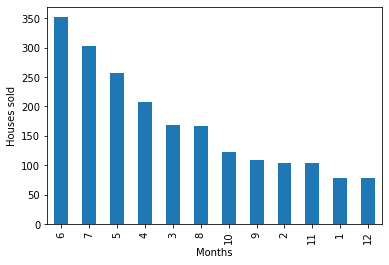

In [37]:
ty_df['Mo Sold'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Houses sold');


June and July are the months with more houses sold and least in Jan and Dec.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


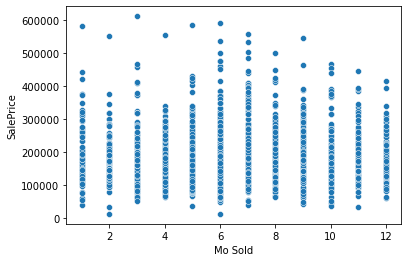

In [38]:
sns.scatterplot(ty_df['Mo Sold'],ty_df['SalePrice']);

In [39]:
ty_df['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

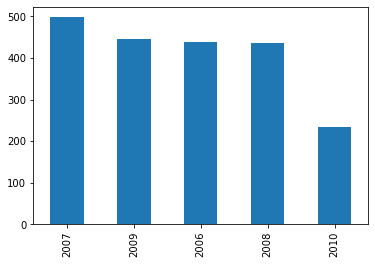

In [40]:
ty_df['Yr Sold'].value_counts().plot(kind='bar');

2007 has max number of homes sold(490) and min in 2010(230)

In [41]:
train_df['Age']=2014- train_df['Year Built'] #calculating age

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

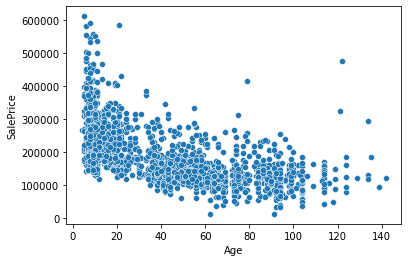

In [42]:
sns.scatterplot(train_df['Age'],train_df['SalePrice'])

slightly negative correlated.Older homes got lesser SalePrice

In [43]:
train_df['Re_Age']=2014 - train_df['Year Remod/Add'] #calculating remodelled age

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Re_Age', ylabel='SalePrice'>

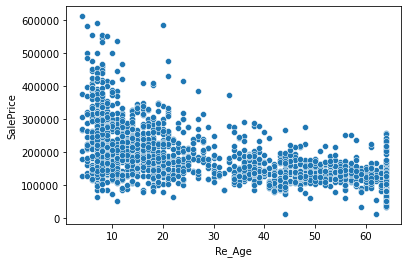

In [44]:
sns.scatterplot(train_df['Re_Age'],train_df['SalePrice'])

slightly negative correlated.Older homes(remodelled) got lesser SalePrice

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

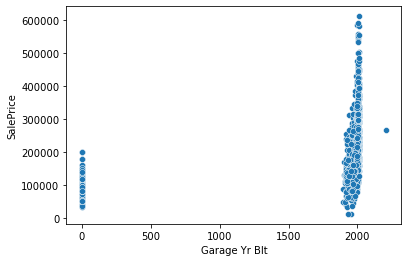

In [45]:
sns.scatterplot(train_df['Garage Yr Blt'],train_df['SalePrice'])

no relation showing,dropping garage build from df

In [46]:
train_df=train_df.drop(columns=['Year Built','Year Remod/Add','Garage Yr Blt'])

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

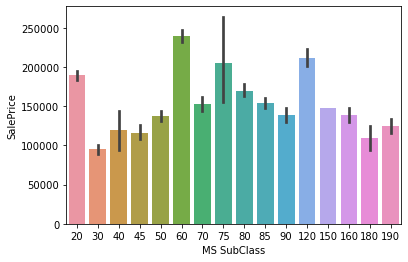

In [47]:
sns.barplot(train_df['MS SubClass'],train_df['SalePrice'])

2-STORY 1946 & NEWER got max SalePrice and 1-STORY 1945 & OLDER got min SalePrice

In [48]:
#no specific linear patter for MS class dropping MS column

In [49]:
train_df=train_df.drop(columns='MS SubClass')

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lot Frontage', ylabel='SalePrice'>

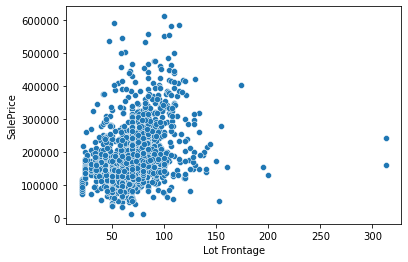

In [50]:
sns.scatterplot(train_df['Lot Frontage'],train_df['SalePrice'])

50 to 100 SF from street connected to property,got SalePrice from 100000 to 300000.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

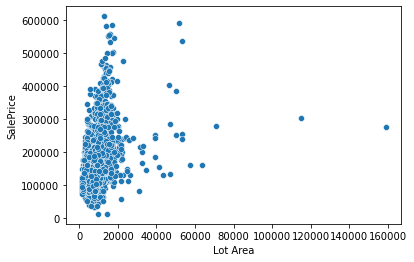

In [51]:
sns.scatterplot(train_df['Lot Area'],train_df['SalePrice'])

regardless of Lot Area,SalePrice increases.

In [52]:
#dropping lot area and lot frontage

In [53]:
train_df=train_df.drop(columns=['Lot Area','Lot Frontage'])

In [54]:
train_df['Overall Qual'].value_counts(normalize=True)

5     0.274500
6     0.246709
7     0.210141
8     0.121892
4     0.077523
9     0.037543
3     0.014139
10    0.011214
2     0.004388
1     0.001950
Name: Overall Qual, dtype: float64

27% homes sold are average quality and below 1 % homes sold with low quality.

In [55]:
train_df['Overall Cond'].value_counts(normalize=True)

5    0.569478
6    0.179425
7    0.131643
8    0.049244
4    0.034130
3    0.017065
9    0.014139
2    0.002925
1    0.001950
Name: Overall Cond, dtype: float64

56% homes sold with Average Condition and below 1 % homes sold with low Condition

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

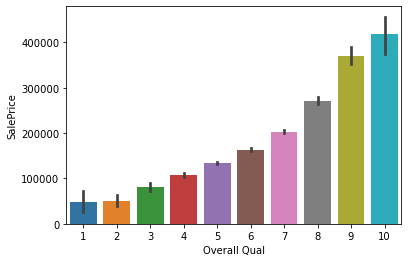

In [56]:
sns.barplot(train_df['Overall Qual'],train_df['SalePrice'])

For High quality homes,SalePrice is more.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


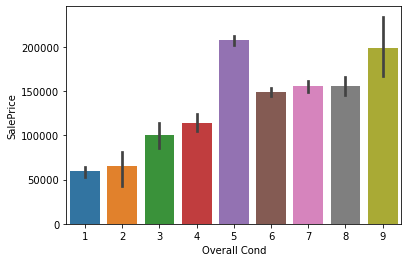

In [57]:
sns.barplot(train_df['Overall Cond'],train_df['SalePrice']);

for Average Overall cond and high cond,Saleprice is more

In [90]:
#taking out all the basement features

In [59]:
bsmt=train_df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','SalePrice']]
bsmt.head()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,SalePrice
0,533.0,0.0,192.0,725.0,130500
1,637.0,0.0,276.0,913.0,220000
2,731.0,0.0,326.0,1057.0,109000
3,0.0,0.0,384.0,384.0,174000
4,0.0,0.0,676.0,676.0,138500


In [ ]:
# To findout correlation , plotting  heatmap

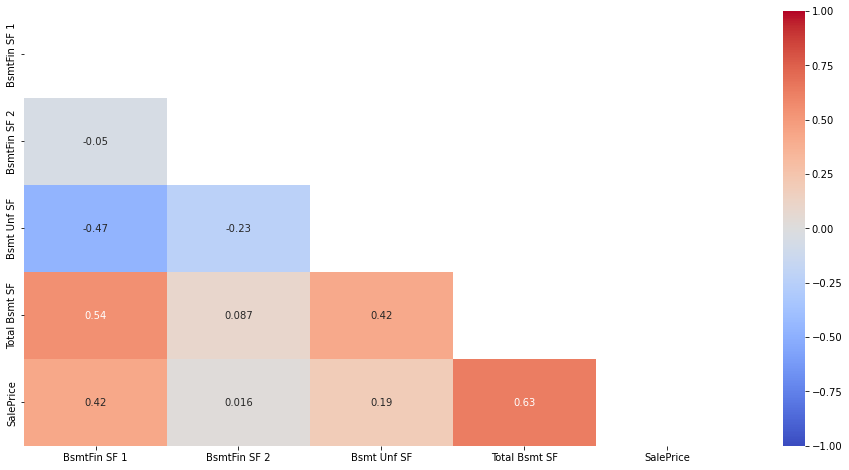

In [62]:
plt.figure(figsize=(16,8))

# creating mask
mask = np.triu(np.ones_like(bsmt.corr()))
 
sns.heatmap(data = bsmt.corr(),
            vmin = -1,
            vmax = +1,
            cmap = 'coolwarm',
            annot = True,
            mask = mask);

In [65]:
# .42+.016+.19 == 0.626 ~ .63

# multicollinearity ie,'BsmtFin SF 1'+'BsmtFin SF 2'+'Bsmt Unf SF'=='Total Bsmt SF'
# checking correlation between Total Bsmt SF and Saleprice

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


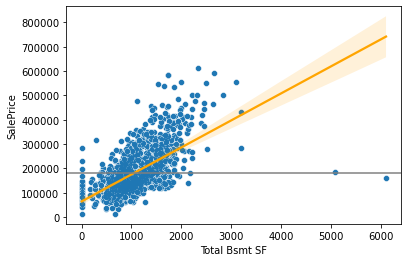

In [72]:
sns.scatterplot(train_df['Total Bsmt SF'],train_df['SalePrice'])
sns.regplot(train_df['Total Bsmt SF'],train_df['SalePrice'],scatter_kws={'s':1},
                                                            line_kws = {'color':'orange'})
plt.axhline(train_df['SalePrice'].mean(),color='grey');
#plot data and a linear regression model

mostly positive correlated between SalePrice and Total basement SF

In [73]:
#taking all the area of house

In [75]:
liv_area=train_df[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','SalePrice']]
liv_area.head()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,SalePrice
0,725,754,0,1479,130500
1,913,1209,0,2122,220000
2,1057,0,0,1057,109000
3,744,700,0,1444,174000
4,831,614,0,1445,138500


In [76]:
liv_area['Low Qual Fin SF'].value_counts()

0       2018
80         3
205        2
512        1
362        1
53         1
360        1
384        1
156        1
436        1
259        1
479        1
140        1
397        1
514        1
144        1
697        1
114        1
390        1
234        1
572        1
312        1
120        1
515        1
1064       1
108        1
473        1
371        1
513        1
528        1
450        1
Name: Low Qual Fin SF, dtype: int64

2018 values are 0 ,dropping Low Qual Fin SF column

In [77]:
 liv_area['1st Flr SF']  + liv_area['2nd Flr SF'] ==  liv_area['Gr Liv Area']
    

0       True
1       True
2       True
3       True
4       True
        ... 
2046    True
2047    True
2048    True
2049    True
2050    True
Length: 2051, dtype: bool

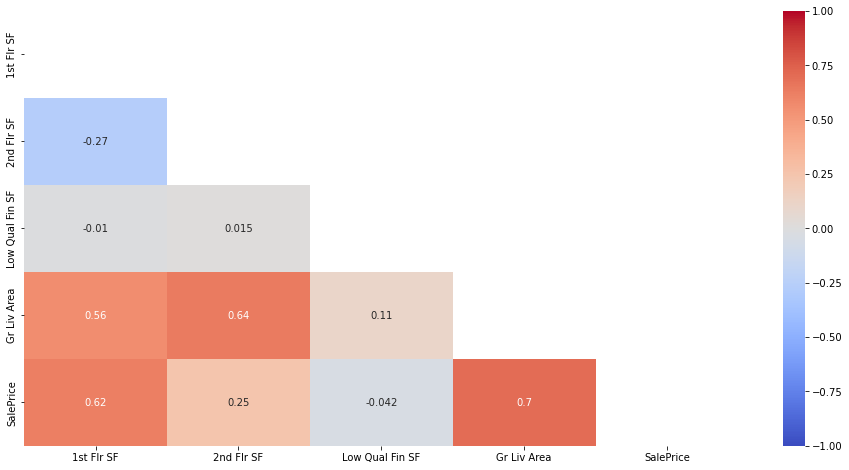

In [78]:
plt.figure(figsize=(16,8))

# creating mask
mask = np.triu(np.ones_like(liv_area.corr()))
 
sns.heatmap(data = liv_area.corr(),
            vmin = -1,
            vmax = +1,
            cmap = 'coolwarm',
            annot = True,
            mask = mask);

In [81]:
# to avoid multicollinearity dropping 1st Flr ,2nd Flr S,Low Qual Fin SF

In [82]:
train_df=train_df.drop(columns=['1st Flr SF','2nd Flr SF','Low Qual Fin SF'])

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


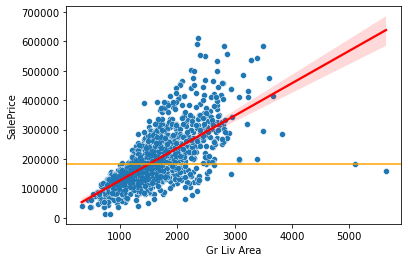

In [84]:
sns.scatterplot(train_df['Gr Liv Area'],train_df['SalePrice'])
sns.regplot(train_df['Gr Liv Area'],train_df['SalePrice'],scatter_kws={'s':1},
                                                            line_kws = {'color':'red'})
plt.axhline(train_df['SalePrice'].mean(),color='orange');
#plot data and a linear regression model

Ground Living Area and SalePrice is positively correlated.

In [86]:
#'Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'

In [91]:
train_df['Bsmt Half Bath'].value_counts()

0.0    1925
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

most of them are zeros,dropping Bsmt Half Bath column

In [116]:
# dropping 'Bsmt Full Bath' since no linear relation:


In [92]:
train_df['Total_bath_grade']=train_df['Full Bath'] +train_df['Half Bath'] #calculating total number of bathrooms

In [93]:
train_df=train_df.drop(columns=['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'])

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


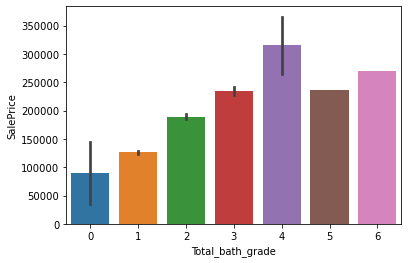

In [96]:
sns.barplot(train_df['Total_bath_grade'],train_df['SalePrice']);

total number of bathrooms and SalePrice have no relation

In [123]:
# dropping bath columns from test and train data

In [99]:
train_df=train_df.drop(columns=['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'])

In [103]:
rooms=train_df[['Bedroom AbvGr','TotRms AbvGrd','Kitchen AbvGr','SalePrice']]

In [106]:
rooms.head()

,Bedroom AbvGr,TotRms AbvGrd,Kitchen AbvGr,SalePrice
0,3,6,1,130500
1,4,8,1,220000
2,3,5,1,109000
3,3,7,1,174000
4,3,6,1,138500


<BarContainer object of 2051 artists>

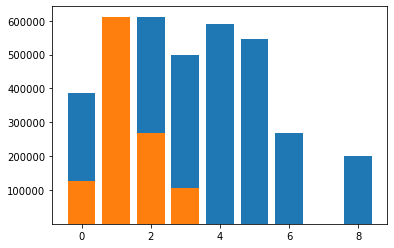

In [121]:
plt.bar(rooms['Bedroom AbvGr'],rooms['SalePrice'])
plt.bar(rooms['Kitchen AbvGr'],rooms['SalePrice'],bottom=rooms['Bedroom AbvGr'])


SalePrice varies in everyrange regardless of rooms

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

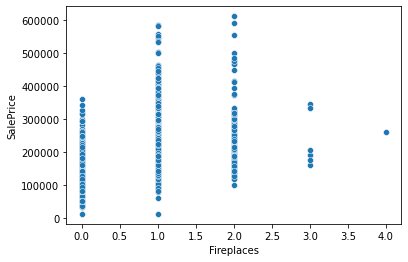

In [122]:
sns.scatterplot(train_df['Fireplaces'],train_df['SalePrice'])

In [138]:
#no realtion showing,dropping Fireplaces column:

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


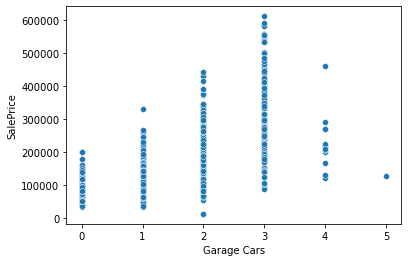

In [124]:
sns.scatterplot(train_df['Garage Cars'],train_df['SalePrice']);

SalePrice got max for 3 space parking Garage cars 

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


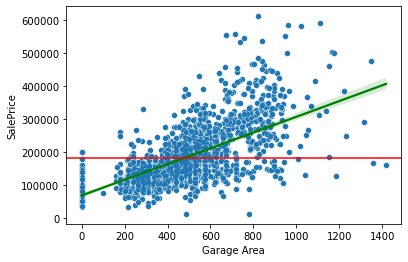

In [128]:
sns.scatterplot(train_df['Garage Area'],train_df['SalePrice'])
sns.regplot(train_df['Garage Area'],train_df['SalePrice'],scatter_kws={'s':1},
                                                            line_kws = {'color':'green'})
plt.axhline(train_df['SalePrice'].mean(),color='red');
#plot data and a linear regression model

SalePrice and Garage Area are positively correlated.

In [132]:
porch=train_df[['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']]

In [135]:
# taking all the porch features

In [133]:
porch.head()

,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,0,44,0,0,0,0,0,130500
1,0,74,0,0,0,0,0,220000
2,0,52,0,0,0,0,0,109000
3,100,0,0,0,0,0,0,174000
4,0,59,0,0,0,0,0,138500


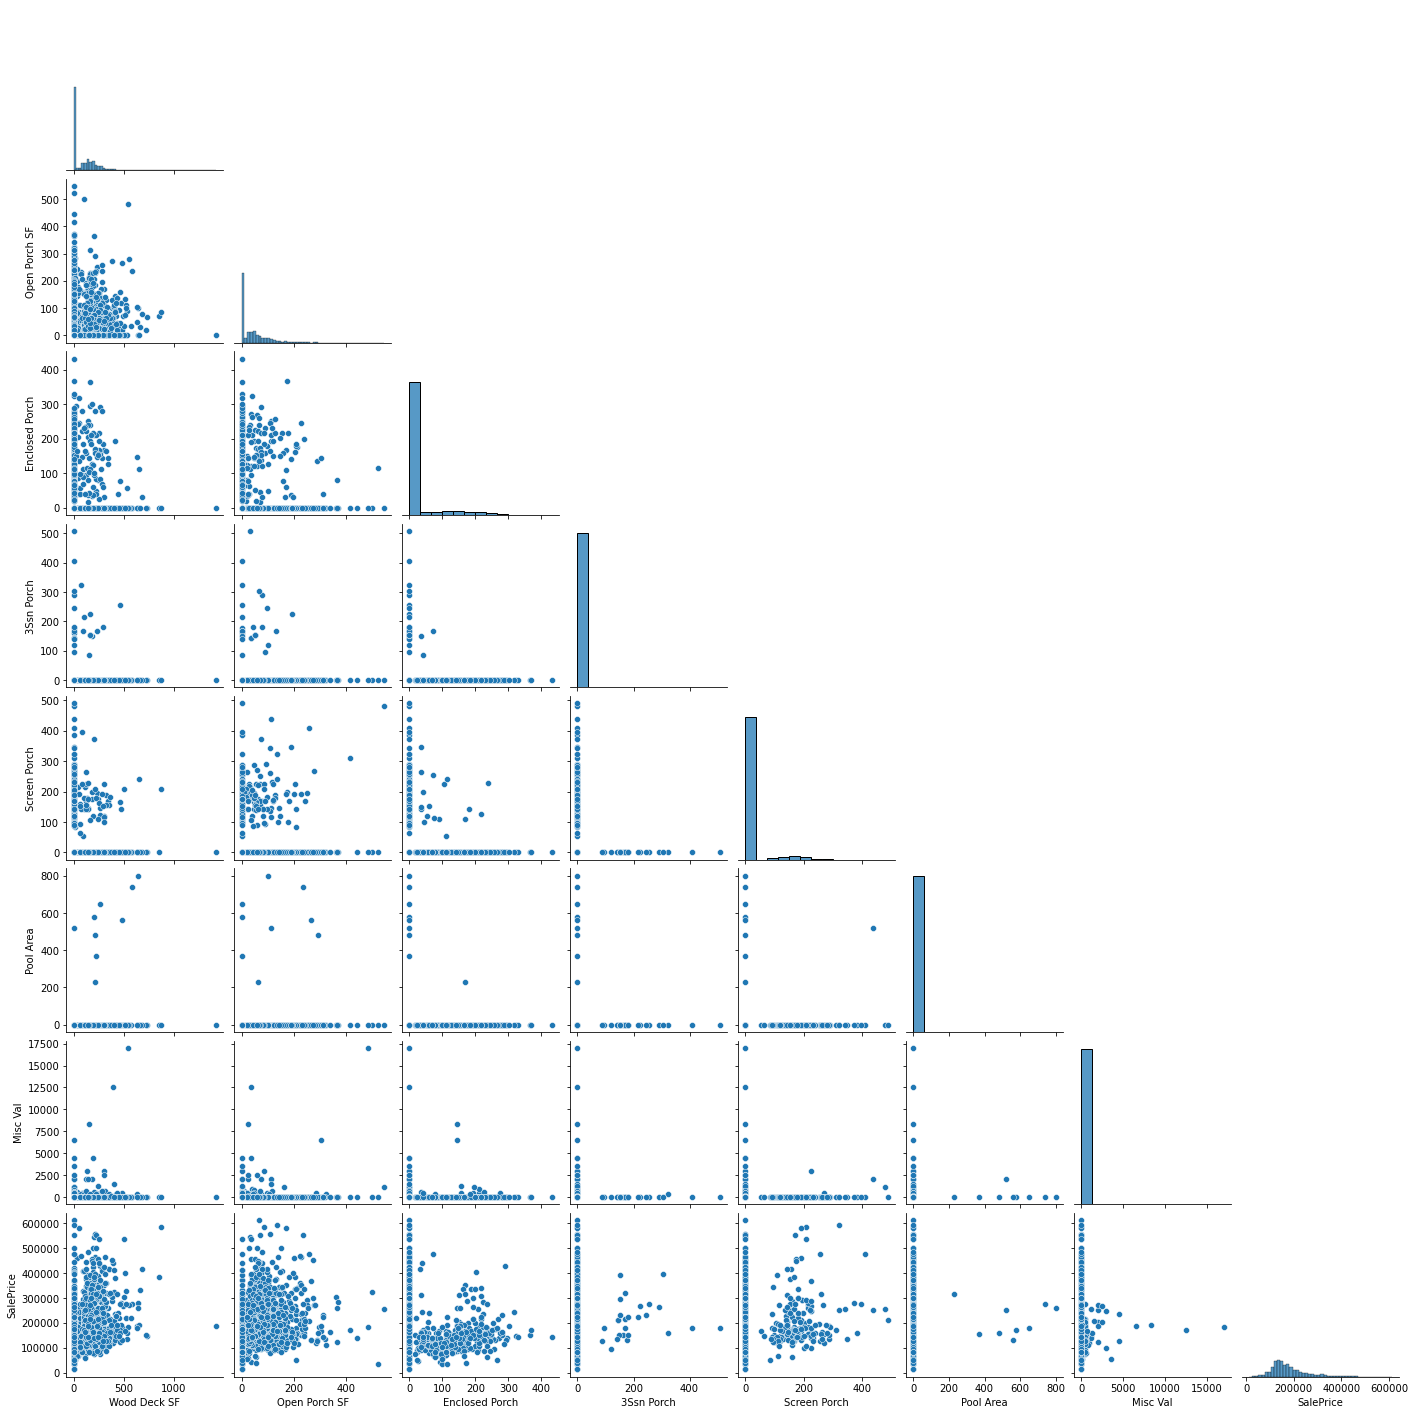

In [134]:
sns.pairplot(porch,corner=True);

In [152]:
#dropping all these columns since none is linearily related.

#  Dealing with categorical column

In [137]:
train_df['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
0      114
Name: Garage Finish, dtype: int64

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


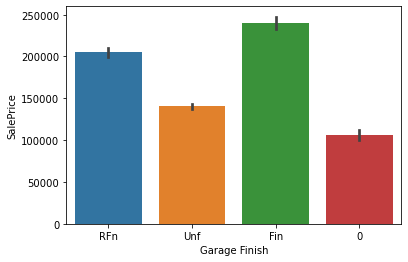

In [140]:
sns.barplot(train_df['Garage Finish'],train_df['SalePrice']);

Finished Garage got more SalePrice than unfinished Garage.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

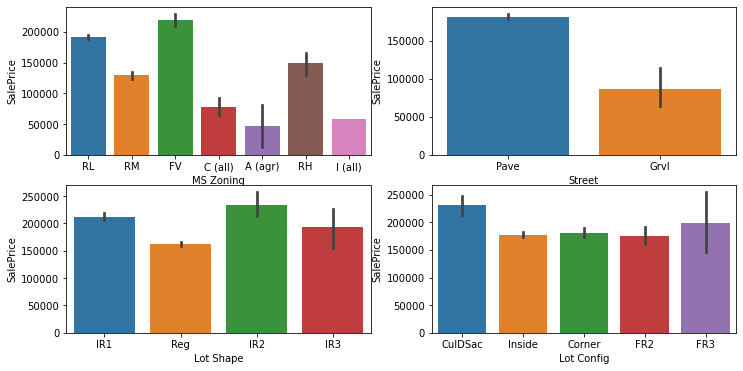

In [141]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,2,1)
sns.barplot('MS Zoning','SalePrice',data=train_df)

ax2 = plt.subplot(2,2,2)
sns.barplot('Street','SalePrice',data=train_df)


ax3 = plt.subplot(2,2,3)
sns.barplot('Lot Shape','SalePrice',data=train_df)                 
                 
ax4 = plt.subplot(2,2,4)
sns.barplot('Lot Config','SalePrice',data=train_df);

Culde-Sac houses ,regular lot shape and paved street houses got more Saleprice than irregular,corner homes

In [143]:
neigh=train_df[['Neighborhood','SalePrice']].sort_values(by='SalePrice',ascending=True)
neigh

,Neighborhood,SalePrice
1628,OldTown,12789
183,IDOTRR,13100
1309,IDOTRR,34900
1292,Edwards,35000
1518,IDOTRR,35311
...,...,...
151,StoneBr,556581
1796,NridgHt,582933
1692,NoRidge,584500
1964,StoneBr,591587


In [148]:
neigh.groupby('Neighborhood').sum().sort_values(by='SalePrice')


,SalePrice
Neighborhood,
Landmrk,137000
GrnHill,560000
Greens,566000
Blueste,867400
BrDale,1964050
NPkVill,2388100
MeadowV,2405550
Veenker,4310700
SWISU,4312284


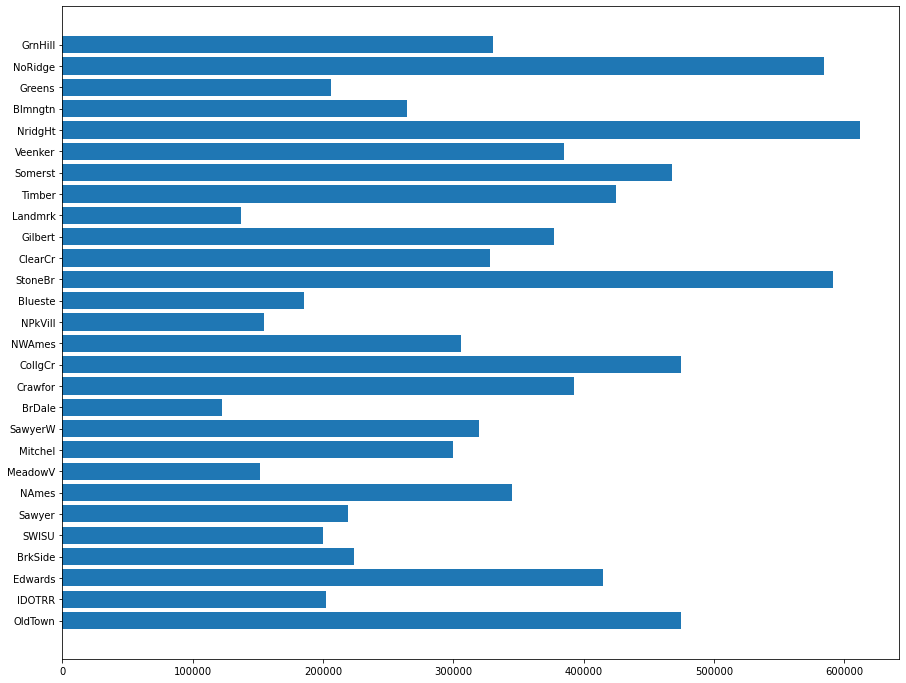

In [151]:
plt.figure(figsize=(15,12))
plt.barh('Neighborhood','SalePrice',data=neigh);

Max Saleprice was in NridgeHt and Low Saleprice was in BrDale.
NAmes max number of Sales(45230803)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kitchen Qual', ylabel='SalePrice'>

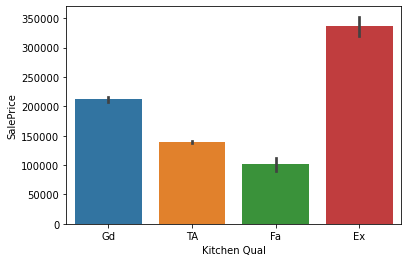

In [152]:
sns.barplot(train_df['Kitchen Qual'],train_df['SalePrice'])

SalePrice increses as Kitchen quality increses.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

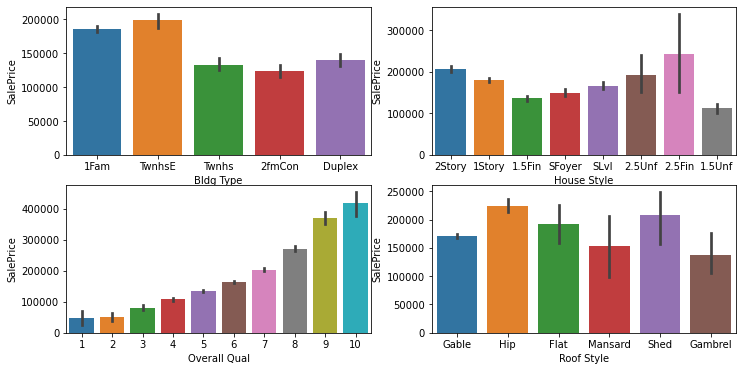

In [153]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,2,1)
sns.barplot('Bldg Type','SalePrice',data=train_df)

ax2 = plt.subplot(2,2,2)
sns.barplot('House Style','SalePrice',data=train_df)


ax3 = plt.subplot(2,2,3)
sns.barplot('Overall Qual','SalePrice',data=train_df)                          
                 
ax4 = plt.subplot(2,2,4)
sns.barplot('Roof Style','SalePrice',data=train_df);

for overall quality there is linear relation ,for lesser quality less price and more quality more price

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


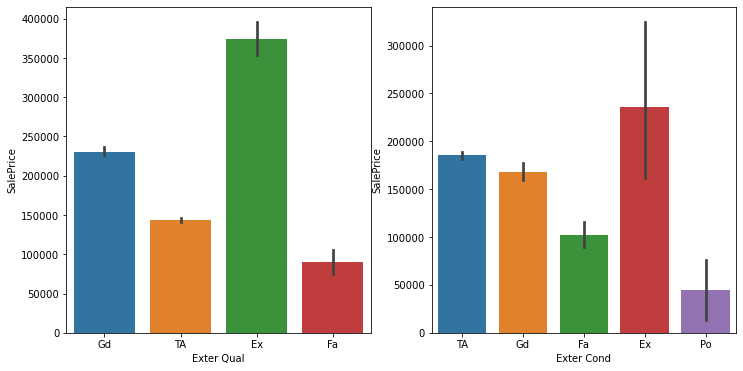

In [162]:

plt.figure(figsize=(12,6))
ax3 = plt.subplot(1,2,1)
sns.barplot('Exter Qual','SalePrice',data=train_df)                          
                 
ax4 = plt.subplot(1,2,2)
sns.barplot('Exter Cond','SalePrice',data=train_df);

SalePrice is more for Excellect Qual and Cond,less for fair.

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

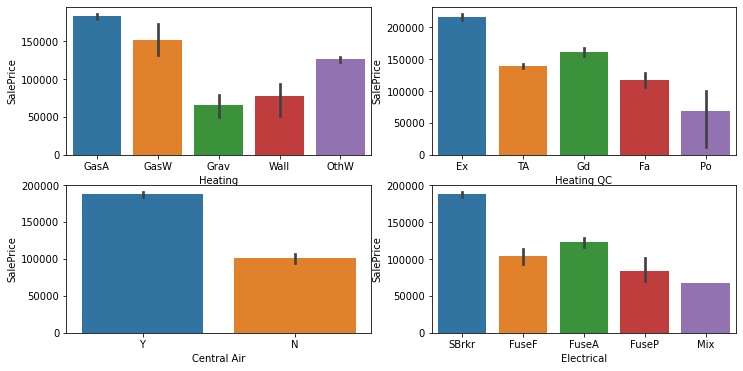

In [163]:
#'Heating', 'Heating QC', 'Central Air', 'Electrical'

plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,2,1)
sns.barplot('Heating','SalePrice',data=train_df)

ax2 = plt.subplot(2,2,2)
sns.barplot('Heating QC','SalePrice',data=train_df)


ax3 = plt.subplot(2,2,3)
sns.barplot('Central Air','SalePrice',data=train_df)                          
                 
ax4 = plt.subplot(2,2,4)
sns.barplot('Electrical','SalePrice',data=train_df);

houses with central Air,saleprice is more.if the house provide facility like Gas,Excellent Heating system,
Saleprice is more than houses with no central air,poor heating sysytem

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

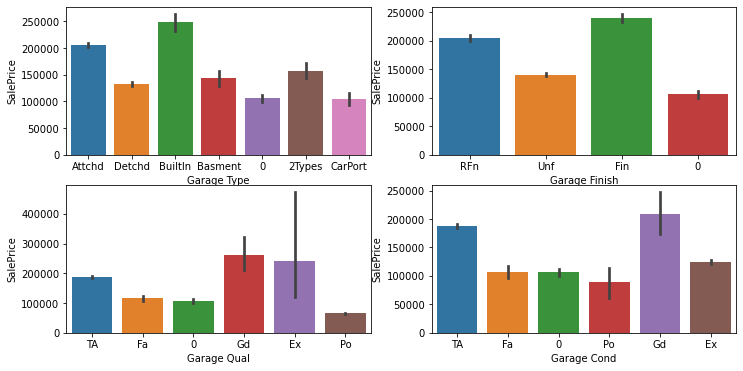

In [165]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,2,1)
sns.barplot('Garage Type','SalePrice',data=train_df)

ax2 = plt.subplot(2,2,2)
sns.barplot('Garage Finish','SalePrice',data=train_df)


ax3 = plt.subplot(2,2,3)
sns.barplot('Garage Qual','SalePrice',data=train_df)                          
                 
ax4 = plt.subplot(2,2,4)
sns.barplot('Garage Cond','SalePrice',data=train_df);

Garage quality matters-if the houses provide a build-in,finished,good condition and quality garage
SalePrice will be more.